In [72]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(summarytools)
library(corrplot)
library(DataExplorer)
library(psych)
library(caret)

In [73]:
# Load the Excel file
data <- read_excel("online_retail.xlsx")
print(data)

# A tibble: 541,909 × 8
   InvoiceNo StockCode Description        Quantity InvoiceDate         UnitPrice
   <chr>     <chr>     <chr>                 <dbl> <dttm>                  <dbl>
 1 536365    85123A    WHITE HANGING HEA…        6 2010-12-01 08:26:00      2.55
 2 536365    71053     WHITE METAL LANTE…        6 2010-12-01 08:26:00      3.39
 3 536365    84406B    CREAM CUPID HEART…        8 2010-12-01 08:26:00      2.75
 4 536365    84029G    KNITTED UNION FLA…        6 2010-12-01 08:26:00      3.39
 5 536365    84029E    RED WOOLLY HOTTIE…        6 2010-12-01 08:26:00      3.39
 6 536365    22752     SET 7 BABUSHKA NE…        2 2010-12-01 08:26:00      7.65
 7 536365    21730     GLASS STAR FROSTE…        6 2010-12-01 08:26:00      4.25
 8 536366    22633     HAND WARMER UNION…        6 2010-12-01 08:28:00      1.85
 9 536366    22632     HAND WARMER RED P…        6 2010-12-01 08:28:00      1.85
10 536367    84879     ASSORTED COLOUR B…       32 2010-12-01 08:34:00      1.69
# ℹ 

In [74]:
# View basic structure and summary
str(data)
summary(data)
# dfSummary(data)

tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00.00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00.00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57.16   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 1

In [75]:
# Drop unnecessary columns
df <- data[, !(names(data) %in% c("StockCode", "InvoiceDate", "CustomerID"))]
print(df)

# A tibble: 541,909 × 5
   InvoiceNo Description                         Quantity UnitPrice Country     
   <chr>     <chr>                                  <dbl>     <dbl> <chr>       
 1 536365    WHITE HANGING HEART T-LIGHT HOLDER         6      2.55 United King…
 2 536365    WHITE METAL LANTERN                        6      3.39 United King…
 3 536365    CREAM CUPID HEARTS COAT HANGER             8      2.75 United King…
 4 536365    KNITTED UNION FLAG HOT WATER BOTTLE        6      3.39 United King…
 5 536365    RED WOOLLY HOTTIE WHITE HEART.             6      3.39 United King…
 6 536365    SET 7 BABUSHKA NESTING BOXES               2      7.65 United King…
 7 536365    GLASS STAR FROSTED T-LIGHT HOLDER          6      4.25 United King…
 8 536366    HAND WARMER UNION JACK                     6      1.85 United King…
 9 536366    HAND WARMER RED POLKA DOT                  6      1.85 United King…
10 536367    ASSORTED COLOUR BIRD ORNAMENT             32      1.69 United King…
# ℹ 

In [76]:
# Check for missing values
missing_data <- sapply(df, function(x) sum(is.na(x)))
print(missing_data)

  InvoiceNo Description    Quantity   UnitPrice     Country 
          0        1454           0           0           0 


In [77]:
# View basic structure and summary
str(df)
summary(df)

tibble [541,909 × 5] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo         Description           Quantity           UnitPrice        
 Length:541909      Length:541909      Min.   :-80995.00   Min.   :-11062.06  
 Class :character   Class :character   1st Qu.:     1.00   1st Qu.:     1.25  
 Mode  :character   Mode  :character   Median :     3.00   Median :     2.08  
                                       Mean   :     9.55   Mean   :     4.61  
                                       3rd Qu.:    10.00   3rd Qu.:     4.13  
                                       Max.   : 80995.00   Max.   : 38970.00  
   Country         
 Length:541909     
 Class :character  
 Mode  :character  
                   
                   
                   

In [78]:
data_clean <- df %>%
  filter(Quantity >= 1, UnitPrice >= 1)

str(data_clean)

tibble [419,211 × 5] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:419211] "536365" "536365" "536365" "536365" ...
 $ Description: chr [1:419211] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:419211] 6 6 8 6 6 2 6 6 6 32 ...
 $ UnitPrice  : num [1:419211] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ Country    : chr [1:419211] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


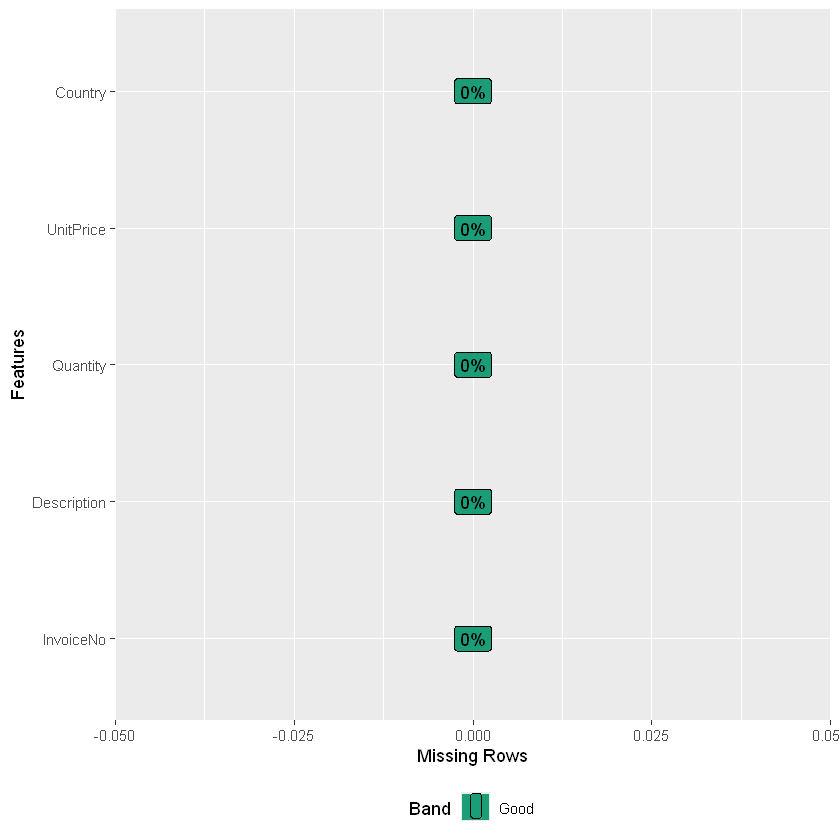

In [79]:
# Visualize missing data
plot_missing(data_clean)

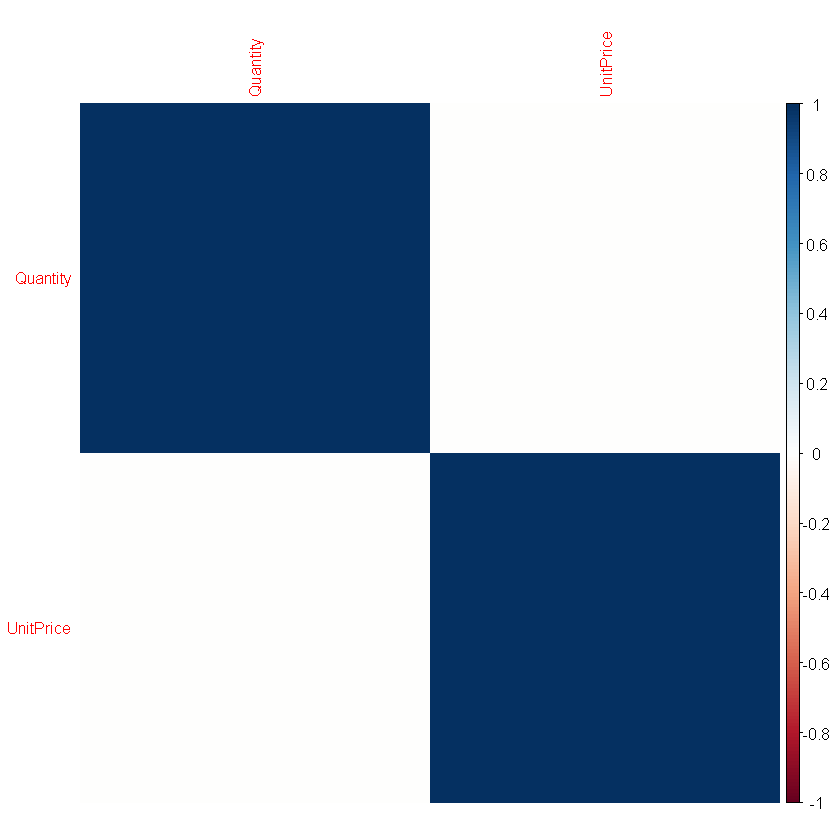

In [80]:
# Correlation analysis
numeric_data <- data_clean %>% select(where(is.numeric)) %>% na.omit()
cor_matrix <- cor(numeric_data)
corrplot(cor_matrix, method = "color", tl.cex = 0.8)

In [81]:
# Quick overview
introduce(data_clean)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
419211,5,3,2,0,0,419211,2096055,18170208


In [58]:
write.csv(data_clean, "data_final.csv", row.names = FALSE)

In [82]:
country_count <- data_clean %>%
  group_by(Country) %>%
  summarise(Transactions = n()) %>%
  arrange(desc(Transactions))

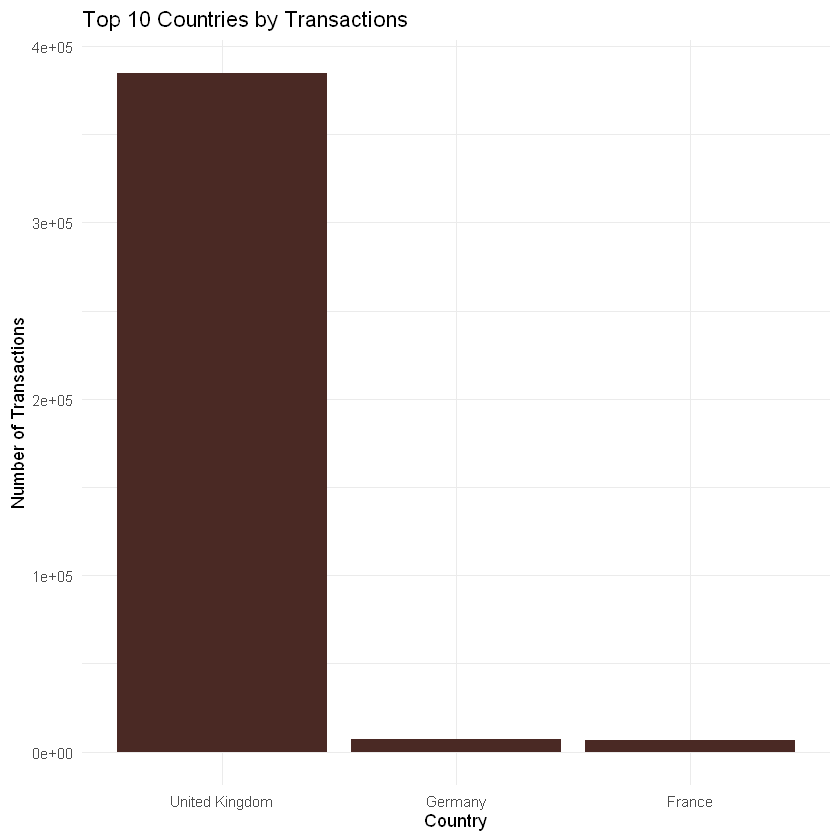

In [83]:
top3 <- head(country_count, 3)

ggplot(top3, aes(x = reorder(Country, -Transactions), y = Transactions)) +
  geom_bar(stat = "identity", fill = "#4a2924") +
  labs(title = "Top 10 Countries by Transactions",
       x = "Country",
       y = "Number of Transactions") +
  theme_minimal()

In [84]:
uk_data <- data_clean %>%
  filter(Country == "United Kingdom") %>%
  select(-Country, -Quantity, -UnitPrice)

ger_data <- data_clean %>%
  filter(Country == "Germany") %>%
  select(-Country, -Quantity, -UnitPrice)

fra_data <- data_clean %>%
  filter(Country == "France") %>%
  select(-Country, -Quantity, -UnitPrice)


In [85]:
print(uk_data)

# A tibble: 384,496 × 2
   InvoiceNo Description                        
   <chr>     <chr>                              
 1 536365    WHITE HANGING HEART T-LIGHT HOLDER 
 2 536365    WHITE METAL LANTERN                
 3 536365    CREAM CUPID HEARTS COAT HANGER     
 4 536365    KNITTED UNION FLAG HOT WATER BOTTLE
 5 536365    RED WOOLLY HOTTIE WHITE HEART.     
 6 536365    SET 7 BABUSHKA NESTING BOXES       
 7 536365    GLASS STAR FROSTED T-LIGHT HOLDER  
 8 536366    HAND WARMER UNION JACK             
 9 536366    HAND WARMER RED POLKA DOT          
10 536367    ASSORTED COLOUR BIRD ORNAMENT      
# ℹ 384,486 more rows


In [86]:
print(ger_data)

# A tibble: 6,923 × 2
   InvoiceNo Description                        
   <chr>     <chr>                              
 1 536527    SET OF 6 T-LIGHTS SANTA            
 2 536527    ROTATING SILVER ANGELS T-LIGHT HLDR
 3 536527    5 HOOK HANGER MAGIC TOADSTOOL      
 4 536527    3 HOOK HANGER MAGIC GARDEN         
 5 536527    5 HOOK HANGER RED MAGIC TOADSTOOL  
 6 536527    JUMBO BAG WOODLAND ANIMALS         
 7 536527    JUMBO BAG OWLS                     
 8 536527    HOT WATER BOTTLE BABUSHKA          
 9 536527    HOMEMADE JAM SCENTED CANDLES       
10 536527    CHILDREN'S CIRCUS PARADE MUG       
# ℹ 6,913 more rows


In [87]:
print(fra_data)

# A tibble: 6,382 × 2
   InvoiceNo Description                       
   <chr>     <chr>                             
 1 536370    ALARM CLOCK BAKELIKE PINK         
 2 536370    ALARM CLOCK BAKELIKE RED          
 3 536370    ALARM CLOCK BAKELIKE GREEN        
 4 536370    VINTAGE HEADS AND TAILS CARD GAME 
 5 536370    SET/2 RED RETROSPOT TEA TOWELS    
 6 536370    ROUND SNACK BOXES SET OF4 WOODLAND
 7 536370    SPACEBOY LUNCH BOX                
 8 536370    LUNCH BOX I LOVE LONDON           
 9 536370    CIRCUS PARADE LUNCH BOX           
10 536370    RED TOADSTOOL LED NIGHT LIGHT     
# ℹ 6,372 more rows


In [65]:
install.packages("arules")
install.packages("arulesViz")

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpSq4Ihi\downloaded_packages


Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'permute', 'zoo', 'tweenr', 'polyclip', 'RcppEigen', 'RcppArmadillo', 'later', 'ca', 'gclus', 'qap', 'registry', 'TSP', 'vegan', 'lmtest', 'ggforce', 'ggrepel', 'viridis', 'tidygraph', 'graphlayouts', 'httpuv', 'crosstalk', 'promises', 'seriation', 'vcd', 'scatterplot3d', 'ggraph', 'DT', 'plotly', 'visNetwork'




package 'permute' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'later' successfully unpacked and MD5 sums checked
package 'ca' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'vegan' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked

In [88]:
library(arules)
library(arulesViz)

In [89]:
# Convert InvoiceNo to character (required by arules)
uk_data$InvoiceNo <- as.character(uk_data$InvoiceNo)

In [90]:
# Convert to transactions using split
transactions_list <- split(uk_data$Description, uk_data$InvoiceNo)

# Convert to "transactions" object
trans <- as(transactions_list, "transactions")


Warning message in asMethod(object):
"removing duplicated items in transactions"


In [110]:
rules <- apriori(trans, parameter = list(supp = 0.01, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3608 item(s), 17631 transaction(s)] done [0.07s].
sorting and recoding items ... [637 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.02s].
writing ... [88 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


     lhs                                       rhs                                  support confidence   coverage      lift count
[1]  {REGENCY TEA PLATE PINK}               => {REGENCY TEA PLATE GREEN}         0.01366911  0.9060150 0.01508706 47.541521   241
[2]  {REGENCY TEA PLATE PINK}               => {REGENCY TEA PLATE ROSES}         0.01338551  0.8872180 0.01508706 41.056539   236
[3]  {SMALL POPCORN HOLDER}                 => {DOTCOM POSTAGE}                  0.01003914  0.9943820 0.01009585 24.868013   177
[4]  {REGENCY TEA PLATE GREEN}              => {REGENCY TEA PLATE ROSES}         0.01593784  0.8363095 0.01905734 38.700717   281
[5]  {SET/20 RED RETROSPOT PAPER NAPKINS}   => {DOTCOM POSTAGE}                  0.01230787  0.9475983 0.01298849 23.698021   217
[6]  {TOILET SIGN OCCUPIED OR VACANT}       => {DOTCOM POSTAGE}                  0.01054960  0.9946524 0.01060632 24.874775   186
[7]  {HANGING HEART ZINC T-LIGHT HOLDER}    => {DOTCOM POSTAGE}                  0.0110600

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


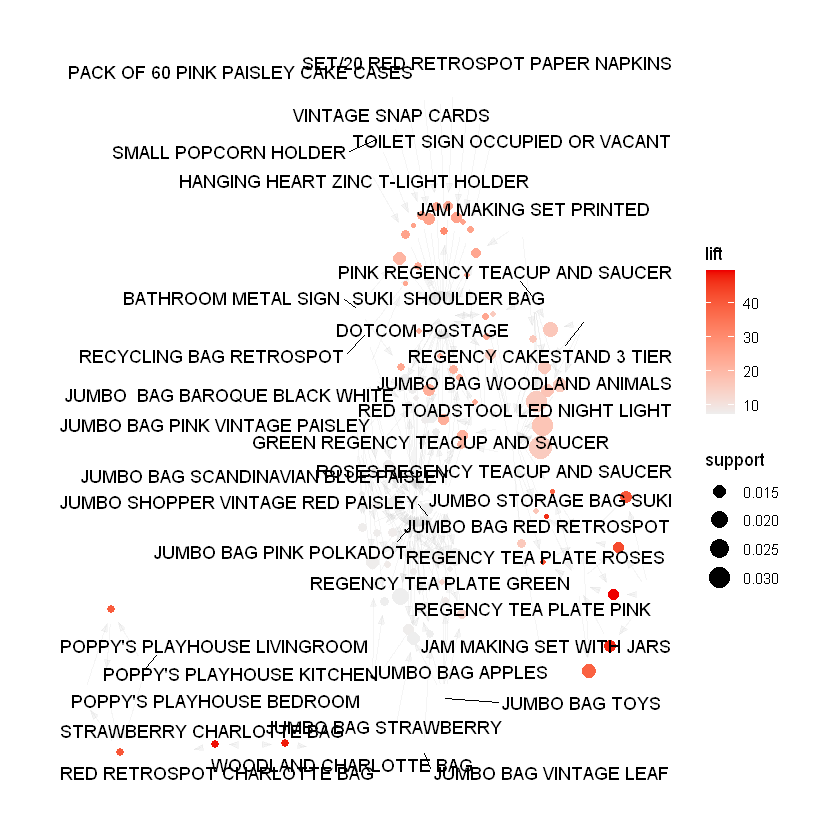

In [113]:
inspect(rules[1:50])  # Show first 10 rules

# Visualize with arulesViz
plot(rules, method = "graph", control = list(type = "items"))